Data Exploration IPEDS: Trends in Staffing 
Case Study: Yale

Institutional Characteristics, Student FTE, Staff FTE
Fall 2002 - Spring 2022

In [121]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

Uploading master merged dataset.

In [122]:
df = pd.read_csv("ic_student_staff_master.csv",low_memory=False,encoding = "ISO-8859-1")
df['year'] = pd.to_datetime(df.year,format='%Y')
df['year'] = df['year'].dt.strftime('%Y')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55959 entries, 0 to 55958
Data columns (total 38 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   unitid                                     55959 non-null  int64  
 1   instnm                                     55959 non-null  object 
 2   addr                                       55725 non-null  object 
 3   city                                       55959 non-null  object 
 4   stabbr                                     55959 non-null  object 
 5   zip                                        55959 non-null  object 
 6   obereg                                     55959 non-null  object 
 7   sector                                     55959 non-null  object 
 8   iclevel                                    55959 non-null  object 
 9   control                                    55959 non-null  object 
 10  deggrant              

Setting up comparison frames

In [123]:
print(df['carnegie_grouped'].unique())

['Doctoral or Research Universities' 'Masters Colleges and Universities'
 'Associates Colleges' 'Baccalaureate Colleges and Universities'
 'Specialized Institutions']


Create dataframes for comparison:
1. Yale
2. Ivy 
3. Peers  

In [124]:
yale = df[df['unitid']==130794]
yale = yale.reset_index(drop=True)
yale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 38 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   unitid                                     20 non-null     int64  
 1   instnm                                     20 non-null     object 
 2   addr                                       17 non-null     object 
 3   city                                       20 non-null     object 
 4   stabbr                                     20 non-null     object 
 5   zip                                        20 non-null     object 
 6   obereg                                     20 non-null     object 
 7   sector                                     20 non-null     object 
 8   iclevel                                    20 non-null     object 
 9   control                                    20 non-null     object 
 10  deggrant                    

In [125]:
ivy = df[df['ivy league']=='ivy']
ivy = ivy.reset_index(drop=True)
ivy.head(2)

unitid              instnm                addr       city stabbr   zip  \
0  130794     Yale University                 NaN  NEW HAVEN     CT  6520   
1  166027  Harvard University  MASSACHUSETTS HALL  CAMBRIDGE     MA  2138   

        obereg                          sector             iclevel  \
0  New England  4-year private, not-for-profit  Four or more years   
1  New England  4-year private, not-for-profit  Four or more years   

                  control  ... total instruction pt  \
0  Private not-for-profit  ...                238.0   
1  Private not-for-profit  ...                368.0   

  total instruction staff fte total non instruction total non instruction ft  \
0                      1309.0                4560.0                   4139.0   
1                      1639.0               10262.0                   8457.0   

  total non instruction pt total non instruction staff fte  \
0                    421.0                          4279.0   
1                   1805.0                          9058.0   

  student fte per staff fte student fte per instruction staff fte  \
0                      2.02                                  8.60   
1                      1.99                                 12.98   

  student fte per non instruction staff fte ivy league  
0                                      2.63        ivy  
1                                      2.35        ivy  

[2 rows x 38 columns]

In [126]:
phd = df[df['carnegie_grouped']=='Doctoral or Research Universities']
phd = phd.reset_index(drop=True)
phd.head(2)

unitid                               instnm  \
0  100654             Alabama A & M University   
1  100663  University Of Alabama At Birmingham   

                             addr        city stabbr         zip     obereg  \
0                4107 MERIDIAN ST      NORMAL     AL       35762  Southeast   
1  ADMINISTRATION BLDG SUITE 1070  BIRMINGHAM     AL  35294-0110  Southeast   

          sector             iclevel control  ... total instruction pt  \
0  4-year public  Four or more years  Public  ...                 84.0   
1  4-year public  Four or more years  Public  ...                 84.0   

  total instruction staff fte total non instruction total non instruction ft  \
0                       320.0                 842.0                    722.0   
1                       959.0                3666.0                   2790.0   

  total non instruction pt total non instruction staff fte  \
0                    120.0                           762.0   
1                    876.0                          3082.0   

  student fte per staff fte student fte per instruction staff fte  \
0                      4.86                                 16.44   
1                      3.06                                 12.88   

  student fte per non instruction staff fte  ivy league  
0                                      6.90  not an ivy  
1                                      4.01  not an ivy  

[2 rows x 38 columns]

Yale - Percentage Change - FTE
1. Annual

In [142]:
yale_pct_change = yale[['unitid','year','student fte','total staff fte','total instruction staff fte','total non instruction staff fte','student fte per staff fte','student fte per instruction staff fte','student fte per non instruction staff fte']]
yale_pct_change = yale_pct_change.reset_index(drop=True)
yale_pct_change.head(2)

unitid  year  student fte  total staff fte  total instruction staff fte  \
0  130794  2002        11261           5588.0                       1309.0   
1  130794  2003        10654           5924.0                       1422.0   

   total non instruction staff fte  student fte per staff fte  \
0                           4279.0                       2.02   
1                           4502.0                       1.80   

   student fte per instruction staff fte  \
0                                   8.60   
1                                   7.49   

   student fte per non instruction staff fte  
0                                       2.63  
1                                       2.37

In [143]:
yale_pct_change['student fte pct change'] = yale_pct_change['student fte'].pct_change()
yale_pct_change['student fte pct change'] = (yale_pct_change['student fte pct change']*100).round(2)
yale_pct_change = yale_pct_change.reset_index(drop=True)

yale_pct_change['staff fte pct change'] = yale_pct_change['total staff fte'].pct_change()
yale_pct_change['staff fte pct change'] = (yale_pct_change['staff fte pct change']*100).round(2)
yale_pct_change = yale_pct_change.reset_index(drop=True)

yale_pct_change['instruction fte pct change'] = yale_pct_change['total instruction staff fte'].pct_change()
yale_pct_change['instruction fte pct change'] = (yale_pct_change['instruction fte pct change']*100).round(2)
yale_pct_change = yale_pct_change.reset_index(drop=True)

yale_pct_change['non instruction fte pct change'] = yale_pct_change['total non instruction staff fte'].pct_change()
yale_pct_change['non instruction fte pct change'] = (yale_pct_change['non instruction fte pct change']*100).round(2)
yale_pct_change = yale_pct_change.reset_index(drop=True)

yale_pct_change = yale_pct_change.fillna(0.00)

Yale - Percentage Change - FTE
2. Cumulative

In [144]:
yale_base_student = 11261
base_date = '2002-01-01'

def yale_pct_change_period_student(row):
    if row['year'] != '2002-01-01':
        return (((row['student fte']-yale_base_student)/yale_base_student)*100)
    else:
        return 0.0
    
yale_pct_change['student pct change cumulative'] = yale_pct_change.apply(lambda row: yale_pct_change_period_student(row), axis=1)
yale_pct_change['student pct change cumulative'] = yale_pct_change['student pct change cumulative'].round(2)

yale_pct_change = yale_pct_change.fillna(0.00)
#print(yale_pct_change)

In [145]:
yale_base_staff = 5588.0
base_date = '2002-01-01'

def yale_pct_change_period_staff(row):
    if row['year'] != '2002-01-01':
        return (((row['total staff fte']-yale_base_staff)/yale_base_staff)*100)
    else:
        return 0.0
    
yale_pct_change['staff pct change cumulative'] = yale_pct_change.apply(lambda row: yale_pct_change_period_staff(row), axis=1)
yale_pct_change['staff pct change cumulative'] = yale_pct_change['staff pct change cumulative'].round(2)

yale_pct_change = yale_pct_change.fillna(0.00)
#print(yale_pct_change)

In [146]:
yale_base_instruction = 1309.0
base_date = '2002-01-01'

def yale_pct_change_period_instruction(row):
    if row['year'] != '2002-01-01':
        return (((row['total instruction staff fte']-yale_base_instruction)/yale_base_instruction)*100)
    else:
        return 0.0
    
yale_pct_change['instruction pct change cumulative'] = yale_pct_change.apply(lambda row: yale_pct_change_period_instruction(row), axis=1)
yale_pct_change['instruction pct change cumulative'] = yale_pct_change['instruction pct change cumulative'].round(2)

yale_pct_change = yale_pct_change.fillna(0.00)

In [147]:
yale_base_non_instruction = 4279.0
base_date = '2002-01-01'

def yale_pct_change_period_non_instruction(row):
    if row['year'] != '2002-01-01':
        return (((row['total non instruction staff fte']-yale_base_non_instruction)/yale_base_non_instruction)*100)
    else:
        return 0.0
    
yale_pct_change['non instruction pct change cumulative'] = yale_pct_change.apply(lambda row: yale_pct_change_period_non_instruction(row), axis=1)
yale_pct_change['non instruction pct change cumulative'] = yale_pct_change['non instruction pct change cumulative'].round(2)

yale_pct_change = yale_pct_change.fillna(0.00)

yale_pct_change.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   unitid                                     20 non-null     int64  
 1   year                                       20 non-null     object 
 2   student fte                                20 non-null     int64  
 3   total staff fte                            20 non-null     float64
 4   total instruction staff fte                20 non-null     float64
 5   total non instruction staff fte            20 non-null     float64
 6   student fte per staff fte                  20 non-null     float64
 7   student fte per instruction staff fte      20 non-null     float64
 8   student fte per non instruction staff fte  20 non-null     float64
 9   student fte pct change                     20 non-null     float64
 10  staff fte pct change        

Yale - Percentage Change - Ratio 
1. Annual

In [183]:
yale_pct_change['student staff ratio pct change'] = yale_pct_change['student fte per staff fte'].pct_change()
yale_pct_change['student staff ratio pct change'] = (yale_pct_change['student staff ratio pct change']*100).round(2)

yale_pct_change['student instruction staff ratio pct change'] = yale_pct_change['student fte per instruction staff fte'].pct_change()
yale_pct_change['student instruction staff ratio pct change'] = (yale_pct_change['student instruction staff ratio pct change']*100).round(2)

yale_pct_change['student non instruction staff ratio pct change'] = yale_pct_change['student fte per non instruction staff fte'].pct_change()
yale_pct_change['student non instruction staff ratio pct change'] = (yale_pct_change['student non instruction staff ratio pct change']*100).round(2)

yale_pct_change = yale_pct_change.fillna(0.00)

Yale - Percentage Change - Ratio 
1. Cumulative

In [184]:
yale_base_staff_ratio = 2.02
base_date = '2002-01-01'

def yale_pct_change_period_staff_ratio(row):
    if row['year'] != '2002-01-01':
        return (((row['student fte per staff fte']-yale_base_staff_ratio)/yale_base_staff_ratio)*100)
    else:
        return 0.0
    
yale_pct_change['student staff ratio pct change cumulative'] = yale_pct_change.apply(lambda row: yale_pct_change_period_staff_ratio(row), axis=1)
yale_pct_change['student staff ratio pct change cumulative'] = yale_pct_change['student staff ratio pct change cumulative'].round(2)


In [185]:
yale_base_instruction_staff_ratio = 8.60
base_date = '2002-01-01'

def yale_pct_change_period_instruction_staff_ratio(row):
    if row['year'] != '2002-01-01':
        return (((row['student fte per instruction staff fte']-yale_base_instruction_staff_ratio)/yale_base_instruction_staff_ratio)*100)
    else:
        return 0.0
    
yale_pct_change['student instruction staff ratio pct change cumulative'] = yale_pct_change.apply(lambda row: yale_pct_change_period_instruction_staff_ratio(row), axis=1)
yale_pct_change['student instruction staff ratio pct change cumulative'] = yale_pct_change['student instruction staff ratio pct change cumulative'].round(2)

In [186]:
yale_base_non_instruction_staff_ratio = 2.63
base_date = '2002-01-01'

def yale_pct_change_period_non_instruction_staff_ratio(row):
    if row['year'] != '2002-01-01':
        return (((row['student fte per non instruction staff fte']-yale_base_non_instruction_staff_ratio)/yale_base_non_instruction_staff_ratio)*100)
    else:
        return 0.0
    
yale_pct_change['student non instruction staff ratio pct change cumulative'] = yale_pct_change.apply(lambda row: yale_pct_change_period_non_instruction_staff_ratio(row), axis=1)
yale_pct_change['student non instruction staff ratio pct change cumulative'] = yale_pct_change['student non instruction staff ratio pct change cumulative'].round(2)

In [187]:
yale_pct_change.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 23 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   unitid                                                     20 non-null     int64  
 1   year                                                       20 non-null     object 
 2   student fte                                                20 non-null     int64  
 3   total staff fte                                            20 non-null     float64
 4   total instruction staff fte                                20 non-null     float64
 5   total non instruction staff fte                            20 non-null     float64
 6   student fte per staff fte                                  20 non-null     float64
 7   student fte per instruction staff fte                      20 non-null     float64
 8   student fte 

Yale - Restacking datasets - by type
1. FTE Total, FTE Percentage Chanage - Annual, FTE Percentage Chanage - Cumulative
2. Ratio Total, Ratio Percentage Chanage - Annual, Ratio Percentage Chanage - Cumulative

In [188]:
cols_fte = ['unitid','year','fte','fte pct change','fte pct change cumulative','type']

yale_fte_pct_change_total_student = yale_pct_change[['unitid','year','student fte','student fte pct change','student pct change cumulative']]
yale_fte_pct_change_total_student = yale_fte_pct_change_total_student.reset_index(drop=True)
yale_fte_pct_change_total_student["type"] = "student"
yale_fte_pct_change_total_student.columns = cols_fte
yale_fte_pct_change_total_student = yale_fte_pct_change_total_student.reset_index(drop=True)
#yale_pct_change_total_student.head(2)

yale_fte_pct_change_total_staff = yale_pct_change[['unitid','year','total staff fte','staff fte pct change','staff pct change cumulative']]
yale_fte_pct_change_total_staff = yale_fte_pct_change_total_staff.reset_index(drop=True)
yale_fte_pct_change_total_staff["type"] = "all staff"
yale_fte_pct_change_total_staff.columns = cols_fte
yale_fte_pct_change_total_staff = yale_fte_pct_change_total_staff.reset_index(drop=True)
#yale_pct_change_total_staff.head(2)

yale_fte_pct_change_total_instruction = yale_pct_change[['unitid','year','total instruction staff fte','instruction fte pct change','instruction pct change cumulative']]
yale_fte_pct_change_total_instruction = yale_fte_pct_change_total_instruction.reset_index(drop=True)
yale_fte_pct_change_total_instruction["type"] = "instructional staff"
yale_fte_pct_change_total_instruction.columns = cols_fte
yale_fte_pct_change_total_instruction = yale_fte_pct_change_total_instruction.reset_index(drop=True)
#yale_pct_change_total_non_instruction.head(2)

yale_fte_pct_change_total_non_instruction = yale_pct_change[['unitid','year','total non instruction staff fte','non instruction fte pct change','non instruction pct change cumulative']]
yale_fte_pct_change_total_non_instruction = yale_fte_pct_change_total_non_instruction.reset_index(drop=True)
yale_fte_pct_change_total_non_instruction["type"] = "non instructional staff"
yale_fte_pct_change_total_non_instruction.columns = cols_fte
yale_fte_pct_change_total_non_instruction = yale_fte_pct_change_total_non_instruction.reset_index(drop=True)
#yale_pct_change_total_non_instruction.head(2)

yale_fte_pct_change_by_type = pd.concat([yale_fte_pct_change_total_student,yale_fte_pct_change_total_staff,yale_fte_pct_change_total_instruction,yale_fte_pct_change_total_non_instruction],ignore_index=False)
yale_fte_pct_change_by_type=yale_fte_pct_change_by_type.reset_index(drop=True)

yale_fte_pct_change_by_type.head(2)

unitid  year      fte  fte pct change  fte pct change cumulative     type
0  130794  2002  11261.0            0.00                       0.00  student
1  130794  2003  10654.0           -5.39                      -5.39  student

In [192]:
cols_ratio = ['unitid','year','student fte per staff fte','ratio pct change','ratio pct change cumulative','type']

yale_ratio_pct_change_total_staff = yale_pct_change[['unitid','year','student fte per staff fte','student staff ratio pct change','student staff ratio pct change cumulative']]
yale_ratio_pct_change_total_staff = yale_ratio_pct_change_total_staff.reset_index(drop=True)
yale_ratio_pct_change_total_staff["type"] = "all staff"
yale_ratio_pct_change_total_staff.columns = cols_ratio
yale_ratio_pct_change_total_staff = yale_ratio_pct_change_total_staff.reset_index(drop=True)
#yale_pct_change_total_staff.head(2)

yale_ratio_pct_change_total_instruction = yale_pct_change[['unitid','year','student fte per instruction staff fte','student instruction staff ratio pct change','student instruction staff ratio pct change cumulative']]
yale_ratio_pct_change_total_instruction = yale_ratio_pct_change_total_instruction.reset_index(drop=True)
yale_ratio_pct_change_total_instruction["type"] = "instructional staff"
yale_ratio_pct_change_total_instruction.columns = cols_ratio
yale_ratio_pct_change_total_instruction = yale_ratio_pct_change_total_instruction.reset_index(drop=True)
#yale_pct_change_total_non_instruction.head(2)

yale_ratio_pct_change_total_non_instruction = yale_pct_change[['unitid','year','student fte per non instruction staff fte','student non instruction staff ratio pct change','student non instruction staff ratio pct change cumulative']]
yale_ratio_pct_change_total_non_instruction = yale_ratio_pct_change_total_non_instruction.reset_index(drop=True)
yale_ratio_pct_change_total_non_instruction["type"] = "non instructional staff"
yale_ratio_pct_change_total_non_instruction.columns = cols_ratio
yale_ratio_pct_change_total_non_instruction = yale_ratio_pct_change_total_non_instruction.reset_index(drop=True)
#yale_pct_change_total_non_instruction.head(2)

yale_ratio_pct_change_by_type = pd.concat([yale_ratio_pct_change_total_staff,yale_ratio_pct_change_total_instruction,yale_ratio_pct_change_total_non_instruction],ignore_index=False)
yale_ratio_pct_change_by_type=yale_ratio_pct_change_by_type.reset_index(drop=True)

yale_ratio_pct_change_by_type.head(2)

unitid  year  student fte per staff fte  ratio pct change  \
0  130794  2002                       2.02              0.00   
1  130794  2003                       1.80            -10.89   

   ratio pct change cumulative       type  
0                         0.00  all staff  
1                       -10.89  all staff

Ivy - FTE - Percentage Change

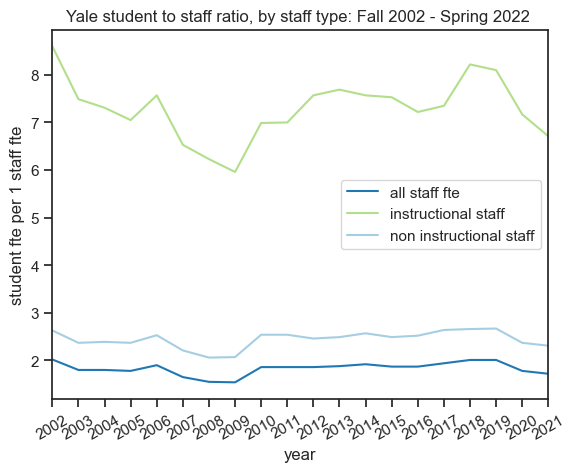

In [193]:
sns.set_theme(style="ticks")
custom_palette = ['#1f78b4','#b2df8a','#a6cee3']
              
yale_student_staff_ratio = sns.lineplot(x='year',y='student staff ratio', hue ='type', data=yale_ratio, legend='brief', palette=custom_palette)

plt.ylabel('student fte per 1 staff fte')
plt.xticks(rotation=30)
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['all staff fte','instructional staff','non instructional staff'])
plt.title('Yale student to staff ratio, by staff type: Fall 2002 - Spring 2022 ')
plt.show()

In [194]:
yale_all_staff = yale_pct_change[['year','staff_fte','staff_pct_change','staff_pct_change_cumulative']]
cols = ['year','fte','percent change','percent change cumulative']
yale_all_staff.columns = cols
yale_all_staff["type"] = "all staff"
yale_all_staff.head(2)

KeyError: "['staff_fte', 'staff_pct_change', 'staff_pct_change_cumulative'] not in index"

In [ ]:
yale_instruction = yale_pct_change[['year','instruction_staff_fte','instruction_staff_pct_change','instruction_pct_change_cumulative']]
cols = ['year','fte','percent change','percent change cumulative']
yale_instruction.columns = cols
yale_instruction["type"] = "instruction, research and public service"
yale_instruction.head(2)

print(yale_instruction)

    year     fte  percent change  percent change cumulative  \
0   2002  1309.0            0.00                       0.00   
1   2003  1422.0            8.63                       8.63   
2   2004  1483.0            4.29                      13.29   
3   2005  1601.0            7.96                      22.31   
4   2006  1655.0            3.37                      26.43   
5   2007  1746.0            5.50                      33.38   
6   2008  1854.0            6.19                      41.63   
7   2009  1948.0            5.07                      48.82   
8   2010  1957.0            0.46                      49.50   
9   2011  1956.0           -0.05                      49.43   
10  2012  1789.0           -8.54                      36.67   
11  2013  1835.0            2.57                      40.18   
12  2014  1918.0            4.52                      46.52   
13  2015  1929.0            0.57                      47.36   
14  2016  2041.0            5.81                      5

/var/folders/5l/g6jpvcjs5mddr5zrcyyl0y4w0000gn/T/ipykernel_51609/1112047952.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yale_instruction["type"] = "instruction, research and public service"


In [ ]:
yale_non_instruction = yale_pct_change[['year','non_instruction_staff_fte','non_instruction_staff_pct_change','non_instruction_pct_change_cumulative']]
cols = ['year','fte','percent change','percent change cumulative']
yale_non_instruction.columns = cols
yale_non_instruction["type"] = "non instructional staff"
yale_non_instruction.head(2)

print(yale_non_instruction)

    year     fte  percent change  percent change cumulative  \
0   2002  4279.0            0.00                       0.00   
1   2003  4502.0            5.21                       5.21   
2   2004  4530.0            0.62                       5.87   
3   2005  4754.0            4.94                      11.10   
4   2006  4949.0            4.10                      15.66   
5   2007  5161.0            4.28                      20.61   
6   2008  5609.0            8.68                      31.08   
7   2009  5612.0            0.05                      31.15   
8   2010  5394.0           -3.88                      26.06   
9   2011  5391.0           -0.06                      25.99   
10  2012  5511.0            2.23                      28.79   
11  2013  5661.0            2.72                      32.30   
12  2014  5648.0           -0.23                      31.99   
13  2015  5820.0            3.05                      36.01   
14  2016  5838.0            0.31                      3

/var/folders/5l/g6jpvcjs5mddr5zrcyyl0y4w0000gn/T/ipykernel_51609/2728745774.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yale_non_instruction["type"] = "non instructional staff"


In [ ]:
yale_student = yale_pct_change[['year','student_fte','student_pct_change','student_pct_change_cumulative']]
cols = ['year','fte','percent change','percent change cumulative']
yale_student.columns = cols
yale_student["type"] = "student"
yale_student.head(2)

/var/folders/5l/g6jpvcjs5mddr5zrcyyl0y4w0000gn/T/ipykernel_51609/2002759879.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yale_student["type"] = "student"


year    fte  percent change  percent change cumulative     type
0  2002  11261            0.00                   0.000000  student
1  2003  10654           -5.39                  -5.390285  student

In [ ]:
yale_staff_by_type = pd.concat([yale_all_staff,yale_instruction,yale_non_instruction],ignore_index=False)
yale_staff_by_type.head(3)

year     fte  percent change  percent change cumulative       type
0  2002  5588.0            0.00                       0.00  all staff
1  2003  5924.0            6.01                       6.01  all staff
2  2004  6013.0            1.50                       7.61  all staff

In [ ]:
yale_all = pd.concat([yale_student,yale_all_staff,yale_instruction,yale_non_instruction],ignore_index=False)
yale_all=yale_all.reset_index(drop=True)
yale_all.head()

year      fte  percent change  percent change cumulative     type
0  2002  11261.0            0.00                   0.000000  student
1  2003  10654.0           -5.39                  -5.390285  student
2  2004  10845.0            1.79                  -3.694166  student
3  2005  11288.0            4.08                   0.239766  student
4  2006  12526.0           10.97                  11.233461  student

In [ ]:
total = ['student','all staff']

def detail(row):
    if row['type'] in total:
        return 'total'
    else:
        return 'detail'
    
yale_all['detail'] = yale_all.apply(lambda row: detail(row), axis=1)

yale_all.head()

year      fte  percent change  percent change cumulative     type detail
0  2002  11261.0            0.00                   0.000000  student  total
1  2003  10654.0           -5.39                  -5.390285  student  total
2  2004  10845.0            1.79                  -3.694166  student  total
3  2005  11288.0            4.08                   0.239766  student  total
4  2006  12526.0           10.97                  11.233461  student  total

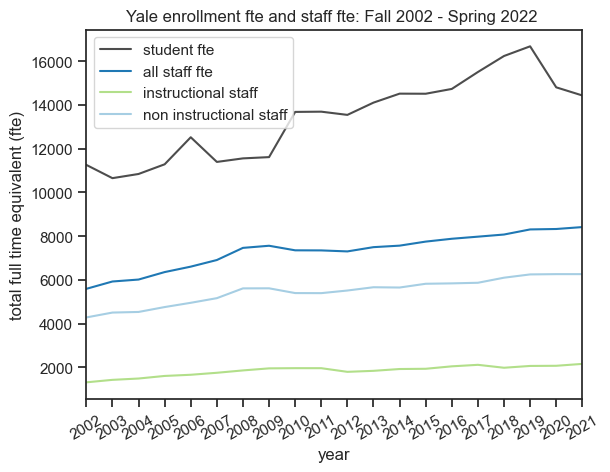

In [ ]:
sns.set_theme(style="ticks")
custom_palette = ['#4d4d4d','#1f78b4','#b2df8a','#a6cee3']
              
fte_all = sns.lineplot(x='year',y='fte', hue ='type', data=yale_all, legend='brief', palette=custom_palette)

plt.ylabel('total full time equivalent (fte)')
plt.xticks(rotation=30)
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['student fte','all staff fte','instructional staff','non instructional staff'])
plt.title('Yale enrollment fte and staff fte: Fall 2002 - Spring 2022 ')
plt.show()

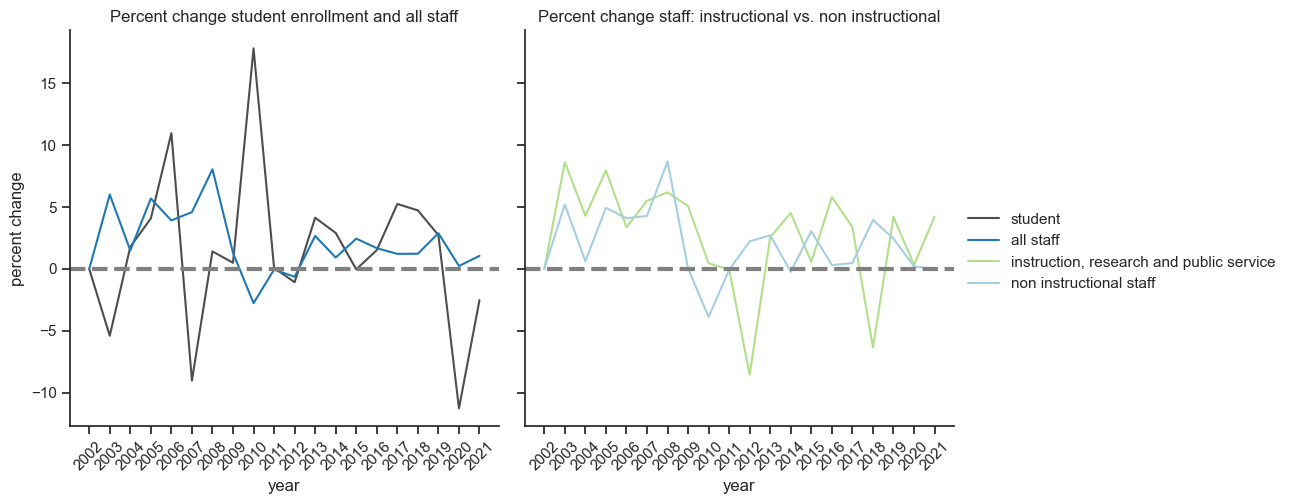

In [ ]:
custom_palette = ['#4d4d4d','#1f78b4','#b2df8a','#a6cee3']

yale_percent_change = sns.relplot(
    data=yale_all, x='year', y='percent change',
    col='detail', hue='type', legend='brief',
    kind="line",palette=custom_palette,
)

axes = yale_percent_change.axes.flatten()
axes[0].set_title("Percent change student enrollment and all staff")
axes[1].set_title("Percent change staff: instructional vs. non instructional")


yale_percent_change.set_xticklabels(rotation=45)

yale_percent_change._legend.set_title("")


for ax in axes:
    ax.axhline(0, ls='--', linewidth=3, color='grey')

plt.show()

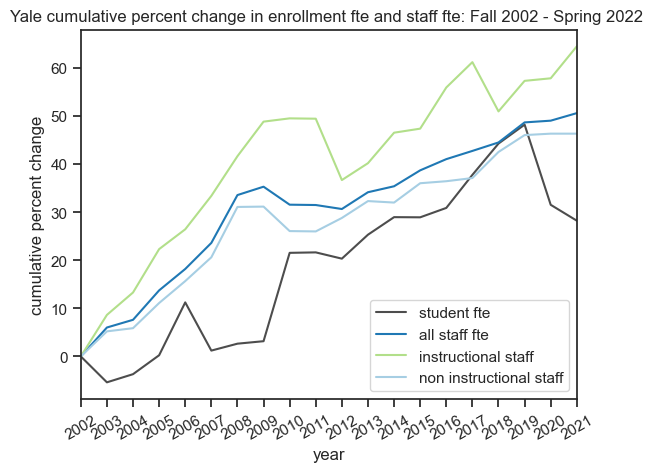

In [ ]:
sns.set_theme(style="ticks")
custom_palette = ['#4d4d4d','#1f78b4','#b2df8a','#a6cee3']
              
yale_percent_change_cumul = sns.lineplot(x='year',y='percent change cumulative', hue ='type', data=yale_all, legend='brief', palette=custom_palette)

plt.ylabel('cumulative percent change')
plt.xticks(rotation=30)
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['student fte','all staff fte','instructional staff','non instructional staff'])
plt.title('Yale cumulative percent change in enrollment fte and staff fte: Fall 2002 - Spring 2022 ')
plt.show()

In [ ]:
ivy_pct_change = ivy.groupby(['year']).agg({'student fte':'sum','total staff fte':'sum','total instruction staff fte':'sum','total non instruction staff fte':'sum'})
ivy_pct_change.columns = ['student_fte','staff_fte','instruction_staff_fte','non_instruction_staff_fte']
ivy_pct_change = ivy_pct_change.reset_index()

ivy_pct_change['student_pct_change'] = ivy_pct_change['student_fte'].pct_change()
ivy_pct_change['student_pct_change'] = (ivy_pct_change['student_pct_change']*100).round(2)

ivy_pct_change['staff_pct_change'] = ivy_pct_change['staff_fte'].pct_change()
ivy_pct_change['staff_pct_change'] = (ivy_pct_change['staff_pct_change']*100).round(2)

ivy_pct_change['instruction_staff_pct_change'] = ivy_pct_change['instruction_staff_fte'].pct_change()
ivy_pct_change['instruction_staff_pct_change'] = (ivy_pct_change['instruction_staff_pct_change']*100).round(2)

ivy_pct_change['non_instruction_staff_pct_change'] = ivy_pct_change['non_instruction_staff_fte'].pct_change()
ivy_pct_change['non_instruction_staff_pct_change'] = (ivy_pct_change['non_instruction_staff_pct_change']*100).round(2)

ivy_pct_change = ivy_pct_change.fillna(0.00)

#print(ivy_pct_change)

In [ ]:
ivy_base_student = 11261
base_date = '2002-01-01'

def ivy_pct_change_period_student(row):
    if row['year'] != '2002-01-01':
        return (((row['student_fte']-ivy_base_student)/ivy_base_student)*100)
    else:
        return 0.0
    
ivy_pct_change['student_pct_change_cumulative'] = ivy_pct_change.apply(lambda row: ivy_pct_change_period_student(row), axis=1)

#print(yale_pct_change)

In [ ]:
ivy_base_staff = 49167.0
base_date = '2002-01-01'

def ivy_pct_change_period_staff(row):
    if row['year'] != '2002-01-01':
        return (((row['staff_fte']-ivy_base_staff)/ivy_base_staff)*100)
    else:
        return 0.0
    
ivy_pct_change['staff_pct_change_cumulative'] = ivy_pct_change.apply(lambda row: ivy_pct_change_period_staff(row), axis=1)
ivy_pct_change['staff_pct_change_cumulative'] = ivy_pct_change['staff_pct_change_cumulative'].round(2)

#print(yale_pct_change)

In [ ]:
ivy_base_instruction = 11127.0
base_date = '2002-01-01'

def ivy_pct_change_period_instruction(row):
    if row['year'] != '2002-01-01':
        return (((row['instruction_staff_fte']-ivy_base_instruction)/ivy_base_instruction)*100)
    else:
        return 0.0
    
ivy_pct_change['instruction_pct_change_cumulative'] = ivy_pct_change.apply(lambda row: ivy_pct_change_period_instruction(row), axis=1)
ivy_pct_change['instruction_pct_change_cumulative'] = ivy_pct_change['instruction_pct_change_cumulative'].round(2)

In [ ]:
ivy_base_non_instruction = 38040.0
base_date = '2002-01-01'

def ivy_pct_change_period_non_instruction(row):
    if row['year'] != '2002-01-01':
        return (((row['non_instruction_staff_fte']-ivy_base_non_instruction)/ivy_base_non_instruction)*100)
    else:
        return 0.0
    
ivy_pct_change['non_instruction_pct_change_cumulative'] = ivy_pct_change.apply(lambda row: ivy_pct_change_period_non_instruction(row), axis=1)
ivy_pct_change['non_instruction_pct_change_cumulative'] = ivy_pct_change['non_instruction_pct_change_cumulative'].round(2)

#print(ivy_pct_change)

In [ ]:
sector_list = ['4-year public','4-year private, not-for-profit','4-year private, for-profit']
carnegie_grouped_list = ['Doctoral or Research Universities']

research = df[(df['sector'].isin(sector_list)) & (df['carnegie_grouped'].isin(carnegie_grouped_list))]
research = research.reset_index(drop=True)
research.head(2)

In [ ]:
research_pct_change = research.groupby(['year']).agg({'student fte':'sum','total staff fte':'sum','total instruction staff fte':'sum','total non instruction staff fte':'sum'})
research_pct_change.columns = ['student_fte','staff_fte','instruction_staff_fte','non_instruction_staff_fte']
research_pct_change = research_pct_change.reset_index()

research_pct_change['student_pct_change'] = research_pct_change['student_fte'].pct_change()
research_pct_change['student_pct_change'] = (research_pct_change['student_pct_change']*100).round(2)

research_pct_change['staff_pct_change'] = research_pct_change['staff_fte'].pct_change()
research_pct_change['staff_pct_change'] = (research_pct_change['staff_pct_change']*100).round(2)

research_pct_change['instruction_staff_pct_change'] = research_pct_change['instruction_staff_fte'].pct_change()
research_pct_change['instruction_staff_pct_change'] = (research_pct_change['instruction_staff_pct_change']*100).round(2)

research_pct_change['non_instruction_staff_pct_change'] = research_pct_change['non_instruction_staff_fte'].pct_change()
research_pct_change['non_instruction_staff_pct_change'] = (research_pct_change['non_instruction_staff_pct_change']*100).round(2)

research_pct_change = research_pct_change.fillna(0.00)

In [ ]:
resarch_base_student = 11261
base_date = '2002-01-01'

def ivy_pct_change_period_student(row):
    if row['year'] != '2002-01-01':
        return (((row['student_fte']-resarch_base_student)/resarch_base_student)*100)
    else:
        return 0.0
    
ivy_pct_change['student_pct_change_cumulative'] = ivy_pct_change.apply(lambda row: ivy_pct_change_period_student(row), axis=1)

#print(yale_pct_change)

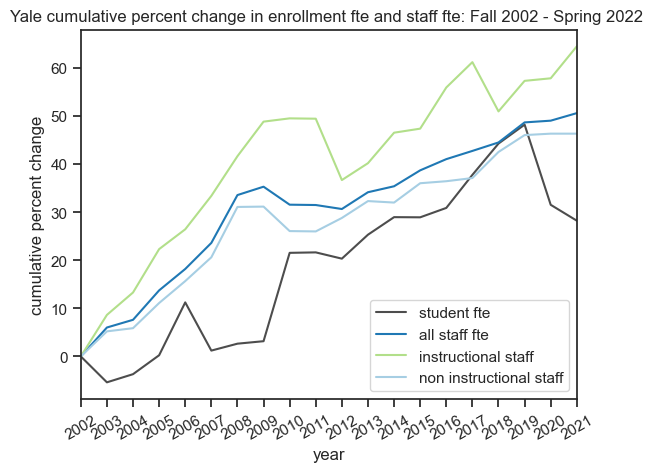

In [ ]:
sns.set_theme(style="ticks")
custom_palette = ['#4d4d4d','#1f78b4','#b2df8a','#a6cee3']
              
ivy_percent_change_cumul = sns.lineplot(x='year',y='percent change cumulative', hue ='type', data=yale_all, legend='brief', palette=custom_palette)

plt.ylabel('cumulative percent change')
plt.xticks(rotation=30)
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['student fte','all staff fte','instructional staff','non instructional staff'])
plt.title('Yale cumulative percent change in enrollment fte and staff fte: Fall 2002 - Spring 2022 ')
plt.show()